In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================
# 1. LOAD DATA
# ============================================
print("\n" + "="*70)
print("STEP 1: LOADING DATA")
print("="*70)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"\nTraining data shape: {train.shape}")
print(f"Test data shape: {test.shape}")


STEP 1: LOADING DATA

Training data shape: (181507, 279)
Test data shape: (77789, 278)


In [ ]:
print("this is head of training data")
print(train.head())
print("this is head of testing data")
print(test.head())



this is head of training data
       id      full_sq      life_sq      floor product_type   sub_area  \
0  106299    -0.280658    50.127224  10.970619       Type_A   Area_380   
1  125559  2129.178675  3438.561939   6.282464       Type_B  Area_1375   
2  204969    44.255548   -15.662341   0.894701       Type_A   Area_272   
3  248026  2622.821354  1373.058212  15.971260       Type_B  Area_1750   
4   51881    52.877556    12.392606   2.876796       Type_A  Area_1773   

   green_zone_part  indust_part  children_preschool  \
0         0.099506     0.222095         6255.829172   
1         0.588042     0.157862         7391.899017   
2         0.074837     0.266754         5658.091711   
3         0.850289     0.393528        13262.734984   
4         0.070450     0.238344         3842.416286   

   preschool_education_centers_raion  ...  office_sqm_5000_log  \
0                           4.076307  ...            13.558453   
1                           7.608949  ...            15.797908

In [22]:
print("This is basic statistics of training data")
print(train.describe()) 
print("This is basic statistics of testing data")
print(test.describe())

This is basic statistics of training data
                  id        full_sq        life_sq          floor  \
count  181507.000000  181507.000000  181507.000000  181507.000000   
mean   129814.082570     446.686938     595.833855      11.597576   
std     74904.378967    1106.420198    1511.699330      14.755608   
min         2.000000     -60.517111     -98.221082      -0.645939   
25%     65091.500000      36.527739      16.459273       3.846373   
50%    129857.000000      57.850524      43.590090       6.776766   
75%    194675.500000      88.740084      90.921327      11.624073   
max    259296.000000    5367.642700    7566.475386      77.659678   

       green_zone_part    indust_part  children_preschool  \
count    181507.000000  181507.000000       181507.000000   
mean          0.240568       0.143316         5478.670101   
std           0.213208       0.141108         3974.438872   
min          -0.013725      -0.010967          -97.948008   
25%           0.065424       0.

In [23]:
'''
2. But Several Columns Have WRONG Values

Your statistics show huge errors/anomalies, meaning you MUST clean your data.

Key issues:
🔴 Negative values in many features

Examples:

full_sq min = –60

life_sq min = –98

children_preschool min = –97

children_school min = –66

life_full_ratio min = –26776

living_efficiency min = –15137

These cannot be legitimate values — they are input errors, outliers, or bad transformations.






❗ 3. Extremely large outliers

Example:

Feature	Max Training	Max Testing	Comment
full_sq	5367	5361	Very large but maybe ok
life_sq	7566	7530	This is extremely unrealistic
children_school	19,334	19,292	Possibly aggregated but still odd
life_full_ratio	11889	15114	This ratio is corrupted
living_efficiency	18,533	21,332	Completely unrealistic



'''

'\n2. But Several Columns Have WRONG Values\n\nYour statistics show huge errors/anomalies, meaning you MUST clean your data.\n\nKey issues:\n🔴 Negative values in many features\n\nExamples:\n\nfull_sq min = –60\n\nlife_sq min = –98\n\nchildren_preschool min = –97\n\nchildren_school min = –66\n\nlife_full_ratio min = –26776\n\nliving_efficiency min = –15137\n\nThese cannot be legitimate values — they are input errors, outliers, or bad transformations.\n\n\n\n\n\n\n❗ 3. Extremely large outliers\n\nExample:\n\nFeature\tMax Training\tMax Testing\tComment\nfull_sq\t5367\t5361\tVery large but maybe ok\nlife_sq\t7566\t7530\tThis is extremely unrealistic\nchildren_school\t19,334\t19,292\tPossibly aggregated but still odd\nlife_full_ratio\t11889\t15114\tThis ratio is corrupted\nliving_efficiency\t18,533\t21,332\tCompletely unrealistic\n\n\n\n'

In [24]:
# 1. Identify numeric columns
num_cols = train.select_dtypes(include=['number']).columns.tolist()

# 2. Remove the target if present
target = 'price_doc'
if target in num_cols:
    num_cols.remove(target)

# 3. Now check negative values safely
print("\n" + "="*70)
print("\nNegative values in training set:")

print((train[num_cols] < 0).sum().sort_values(ascending=False).head(30))

print("\n" + "="*70)
print("\nNegative values in test set:")
print((test[num_cols] < 0).sum().sort_values(ascending=False).head(30))




Negative values in training set:
mosque_count_500                         76676
mosque_count_1000                        75011
cafe_count_500_price_high                74662
mosque_count_1500                        73178
culture_objects_top_25_raion             71974
cafe_count_1000_price_high               71473
cafe_count_500_price_4000                69649
school_education_centers_top_20_raion    69309
mosque_count_2000                        69276
cafe_count_1500_price_high               68820
leisure_count_500                        68751
build_count_foam                         68460
university_top_20_raion                  67358
cafe_count_2000_price_high               66292
market_count_500                         65561
cafe_count_1000_price_4000               61653
big_church_count_500                     61641
mosque_count_3000                        60984
cafe_count_3000_price_high               60549
cafe_count_500_na_price                  60180
leisure_count_1000       

In [25]:
import pandas as pd
import numpy as np

num_cols = train.select_dtypes(include=['number']).columns.tolist()
num_cols = [c for c in num_cols if c != 'price_doc']  # remove target if present

corr = train[num_cols + ['price_doc']].corr()['price_doc'].sort_values(ascending=False)
corr.head(20), corr.tail(20)


(price_doc                     1.000000
 large_apartment               0.737889
 full_sq                       0.669290
 leisure_count_1000            0.659987
 leisure_count_500             0.659467
 cafe_count_500_price_4000     0.654416
 trc_sqm_500                   0.651915
 cafe_count_1000_price_high    0.651016
 mosque_count_500              0.649162
 cafe_count_500_price_high     0.648583
 cafe_count_500_price_1000     0.646469
 leisure_count_1500            0.640853
 cafe_count_1000_price_2500    0.638695
 cafe_count_1000_price_4000    0.638275
 office_sqm_1000               0.637163
 cafe_count_500_price_1500     0.636903
 cafe_count_1500_price_high    0.636007
 office_count_500              0.635852
 big_church_count_1000         0.635598
 big_church_count_500          0.635320
 Name: price_doc, dtype: float64,
 school_education_centers_raion    0.246543
 work_male                         0.244775
 ekder_all                         0.237824
 market_count_5000                

In [26]:
outliers = {}

for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers[col] = ((train[col] < lower) | (train[col] > upper)).sum()

outlier_series = pd.Series(outliers).sort_values(ascending=False)
outlier_series.head(20)


build_count_foam                         44265
mosque_count_2000                        42676
school_education_centers_top_20_raion    42347
university_top_20_raion                  42036
cafe_count_1500_price_high               42000
leisure_count_500                        41857
school_km                                40500
cafe_count_500_price_4000                40035
public_transport_station_min_walk        39676
public_transport_station_km              39674
preschool_km                             38362
kindergarten_km                          38344
life_sq                                  38198
rooms_inferred                           38156
cafe_count_1000_price_high               37707
market_count_500                         37417
cafe_count_3000_price_high               37252
full_all_log                             36504
culture_objects_top_25_raion             36299
cafe_count_2000_price_high               36180
dtype: int64

In [27]:
skew_vals = train[num_cols].skew().sort_values(ascending=False)
skew_vals.head(20)


rooms_inferred                  2.994130
life_sq                         2.989646
full_sq                         2.907440
build_count_foam                2.895906
mosque_count_500                2.811266
trc_sqm_500                     2.787118
church_synagogue_km             2.743202
leisure_count_500               2.726963
leisure_count_1000              2.694443
cafe_count_500_price_4000       2.692486
floor                           2.691590
industrial_km                   2.688037
cafe_count_500_price_high       2.681242
culture_objects_top_25_raion    2.666675
build_count_after_1995          2.664406
cafe_count_1000_price_high      2.660421
cafe_count_1000_price_4000      2.630994
big_church_count_500            2.628166
church_count_500                2.627993
cafe_count_500_price_1000       2.617492
dtype: float64

In [28]:
from numpy import log1p
 
skewed_cols = skew_vals[skew_vals > 1].index.tolist()

train[skewed_cols] = train[skewed_cols].apply(log1p)
test[skewed_cols] = test[skewed_cols].apply(log1p)


count    181507.000000
mean         14.845599
std          21.533138
min           0.392328
25%           5.303449
50%           7.186257
75%          11.781645
max         109.864990
Name: price_doc, dtype: float64

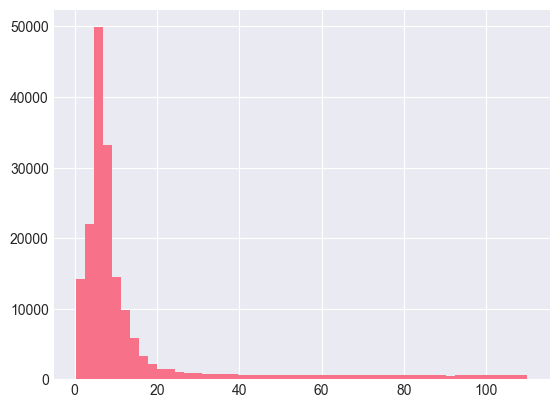

In [29]:
train['price_doc'].hist(bins=50)
train['price_doc'].describe()


In [30]:
train['price_doc_log'] = np.log1p(train['price_doc'])
print(train['price_doc_log'].describe())

count    181507.000000
mean          2.288535
std           0.851618
min           0.330977
25%           1.841097
50%           2.102457
75%           2.548010
max           4.708313
Name: price_doc_log, dtype: float64


In [38]:
sub_area_mean_price = train.groupby('sub_area')['price_doc'].mean()
train['sub_area_enc'] = train['sub_area'].map(sub_area_mean_price)


In [31]:
num_cols = train.select_dtypes(include='number').columns
train[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
id,181507.0,129814.082570,74904.378967,2.000000,65091.500000,129857.000000,194675.500000,259296.000000
full_sq,178113.0,4.427431,1.539647,-6.031037,3.657466,4.088919,4.508861,8.588330
life_sq,159215.0,4.428548,1.952516,-6.483796,3.320045,3.949068,4.805543,8.931615
floor,181507.0,2.132743,0.823349,-1.038286,1.578230,2.051141,2.535606,4.365131
green_zone_part,181507.0,0.240568,0.213208,-0.013725,0.065424,0.167194,0.370981,0.867485
...,...,...,...,...,...,...,...,...
large_apartment,181507.0,0.120817,0.262959,0.000000,0.000000,0.000000,0.000000,0.693147
rooms_inferred,181507.0,1.858415,1.610221,0.693147,0.693147,1.098612,1.945910,6.224558
living_efficiency,181507.0,2.081635,87.664118,-15137.795627,0.242012,0.710820,1.471545,18533.764079
price_doc,181507.0,14.845599,21.533138,0.392328,5.303449,7.186257,11.781645,109.864990


In [32]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns

train[cat_cols].describe().T


,count,unique,top,freq
product_type,181507,2,Type_A,141662
sub_area,181507,1926,Area_665,1112
culture_objects_top_25,181507,2,no,158273
thermal_power_plant_raion,181507,2,no,157444
incineration_raion,181507,2,no,163764
oil_chemistry_raion,181507,2,no,165703
radiation_raion,181507,2,no,109909
railroad_terminal_raion,181507,2,no,160405
big_market_raion,181507,2,no,159415
nuclear_reactor_raion,181507,2,no,162485


In [33]:
train[num_cols].kurt().sort_values(ascending=False).head(20)


life_full_ratio                          32376.112569
living_efficiency                        19790.076712
raion_build_count_with_builddate_info       10.787580
raion_build_count_with_material_info        10.403488
price_doc                                    7.062885
mosque_count_500                             5.577998
trc_sqm_5000_log                             4.627279
mosque_count_1000                            4.485232
build_count_1946-1970                        4.165523
build_count_panel                            4.159021
cafe_count_500_price_high                    3.875951
build_count_block                            3.516744
sport_count_5000_log                         3.398413
mosque_count_1500                            3.146125
build_count_foam                             3.000347
cafe_sum_5000_max_price_avg                  2.829177
cafe_count_1000_price_high                   2.788356
trc_sqm_3000                                 2.779340
cafe_avg_price_5000         

In [34]:
missing = train.isna().sum().sort_values(ascending=False)
missing_percent = (train.isna().sum() / len(train) * 100).sort_values(ascending=False)

missing_table = pd.concat([missing, missing_percent], axis=1)
missing_table.columns = ['Missing Count', 'Missing %']
missing_table.head(30)   # show top 30


,Missing Count,Missing %
trc_sqm_500,54130,29.822541
office_sqm_500,51341,28.285961
build_count_wood,37082,20.430066
office_sqm_1000,35556,19.589327
trc_sqm_1000,28611,15.763028
office_sqm_1500,26565,14.635799
build_count_before_1920,24748,13.634736
life_sq,22292,12.281620
office_sqm_2000,21695,11.952707
trc_sqm_1500,17307,9.535169


In [35]:
missing_test = test.isna().sum().sort_values(ascending=False)
missing_percent_test = (test.isna().sum() / len(test) * 100).sort_values(ascending=False)

missing_table_test = pd.concat([missing_test, missing_percent_test], axis=1)
missing_table_test.columns = ['Missing Count', 'Missing %']
missing_table_test.head(30)


,Missing Count,Missing %
trc_sqm_500,23300,29.952821
office_sqm_500,22111,28.424327
build_count_wood,15721,20.209798
office_sqm_1000,15056,19.354922
trc_sqm_1000,12362,15.891707
office_sqm_1500,11416,14.675597
build_count_before_1920,10559,13.573899
life_sq,9642,12.395069
office_sqm_2000,9290,11.942563
trc_sqm_1500,7414,9.530911


In [36]:
num_cols = train.select_dtypes(include='number').columns
cat_cols = train.select_dtypes(include=['object', 'category']).columns

len(num_cols), len(cat_cols)


(265, 15)

In [37]:
import pandas as pd

# 1️⃣ Identify categorical columns
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2️⃣ Count unique values per categorical column
cat_summary = pd.DataFrame(index=cat_cols)
cat_summary['unique_values'] = train[cat_cols].nunique()
cat_summary['top_values'] = train[cat_cols].apply(lambda x: x.value_counts().index[0])
cat_summary['top_count'] = train[cat_cols].apply(lambda x: x.value_counts().iloc[0])

# 3️⃣ Decide encoding type based on unique values
def encoding_type(n):
    if n == 2:
        return 'Binary / Label'
    elif 3 <= n <= 10:
        return 'Ordinal / One-Hot'
    else:
        return 'High-Cardinality / Frequency or Target'

cat_summary['recommended_encoding'] = cat_summary['unique_values'].apply(encoding_type)

# 4️⃣ Optional: show how many columns One-Hot would generate
cat_summary['one_hot_columns_needed'] = cat_summary['unique_values'].apply(lambda x: x if x <= 10 else 'Too many (>10)')

# 5️⃣ Show the summary
cat_summary.sort_values('unique_values', ascending=False)


,unique_values,top_values,top_count,recommended_encoding,one_hot_columns_needed
sub_area,1926,Area_665,1112,High-Cardinality / Frequency or Target,Too many (>10)
ecology,5,Eco_1,57964,Ordinal / One-Hot,5
product_type,2,Type_A,141662,Binary / Label,2
thermal_power_plant_raion,2,no,157444,Binary / Label,2
incineration_raion,2,no,163764,Binary / Label,2
oil_chemistry_raion,2,no,165703,Binary / Label,2
culture_objects_top_25,2,no,158273,Binary / Label,2
radiation_raion,2,no,109909,Binary / Label,2
railroad_terminal_raion,2,no,160405,Binary / Label,2
nuclear_reactor_raion,2,no,162485,Binary / Label,2


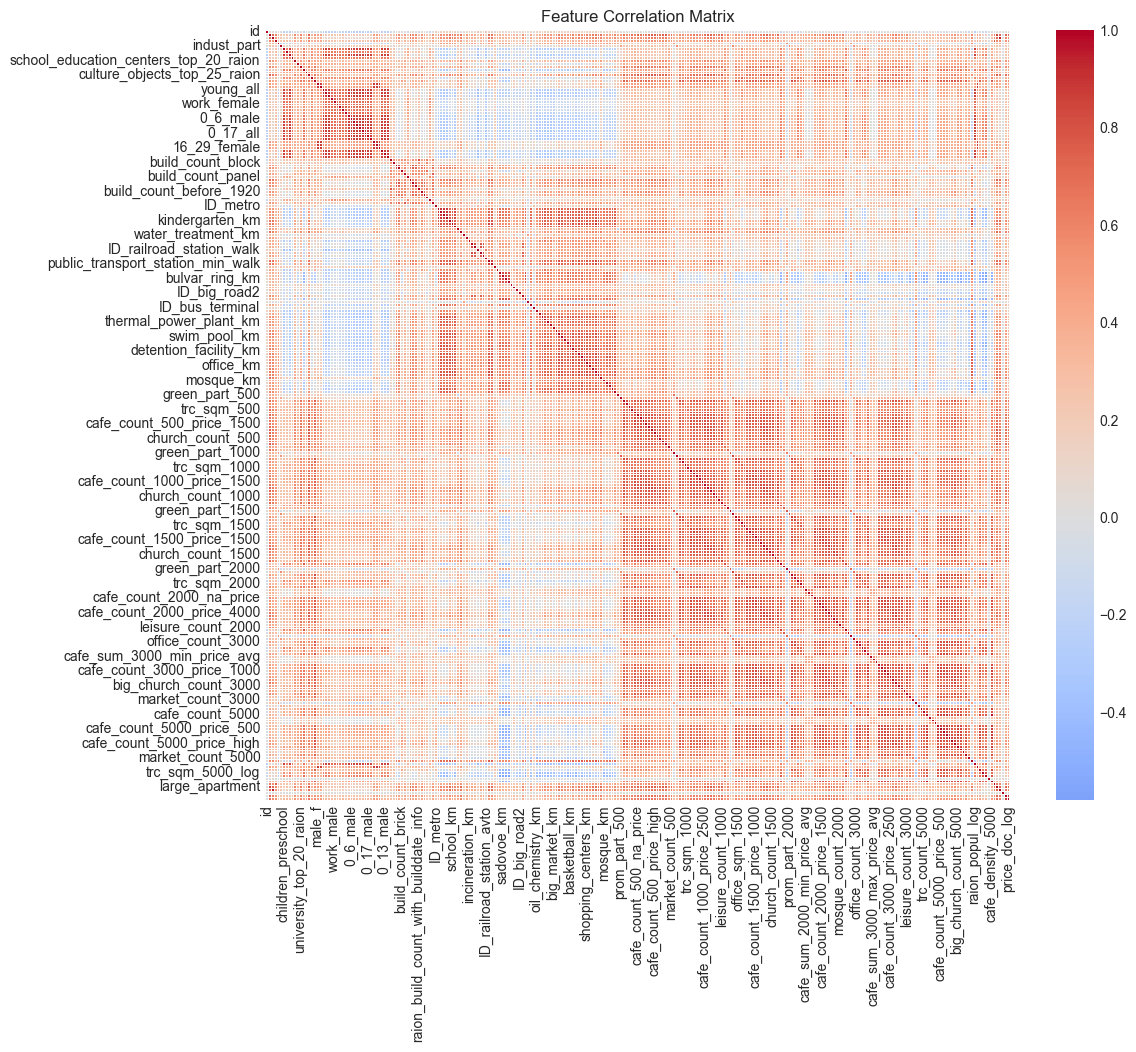

[('life_sq', 'rooms_inferred', np.float64(0.9578973534034746)),
 ('metro_km_avto', 'metro_km_walk', np.float64(0.9010646293785903)),
 ('school_km', 'preschool_km', np.float64(0.902681636722978)),
 ('cafe_count_5000', 'cafe_density_5000', np.float64(0.9863839559125953))]

In [39]:
corr_matrix = train[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Highly correlated pairs (|corr| > 0.9)
high_corr = np.where(np.abs(corr_matrix) > 0.9)
high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x,y])
             for x,y in zip(*high_corr) if x!=y and x<y]
high_corr[:20]


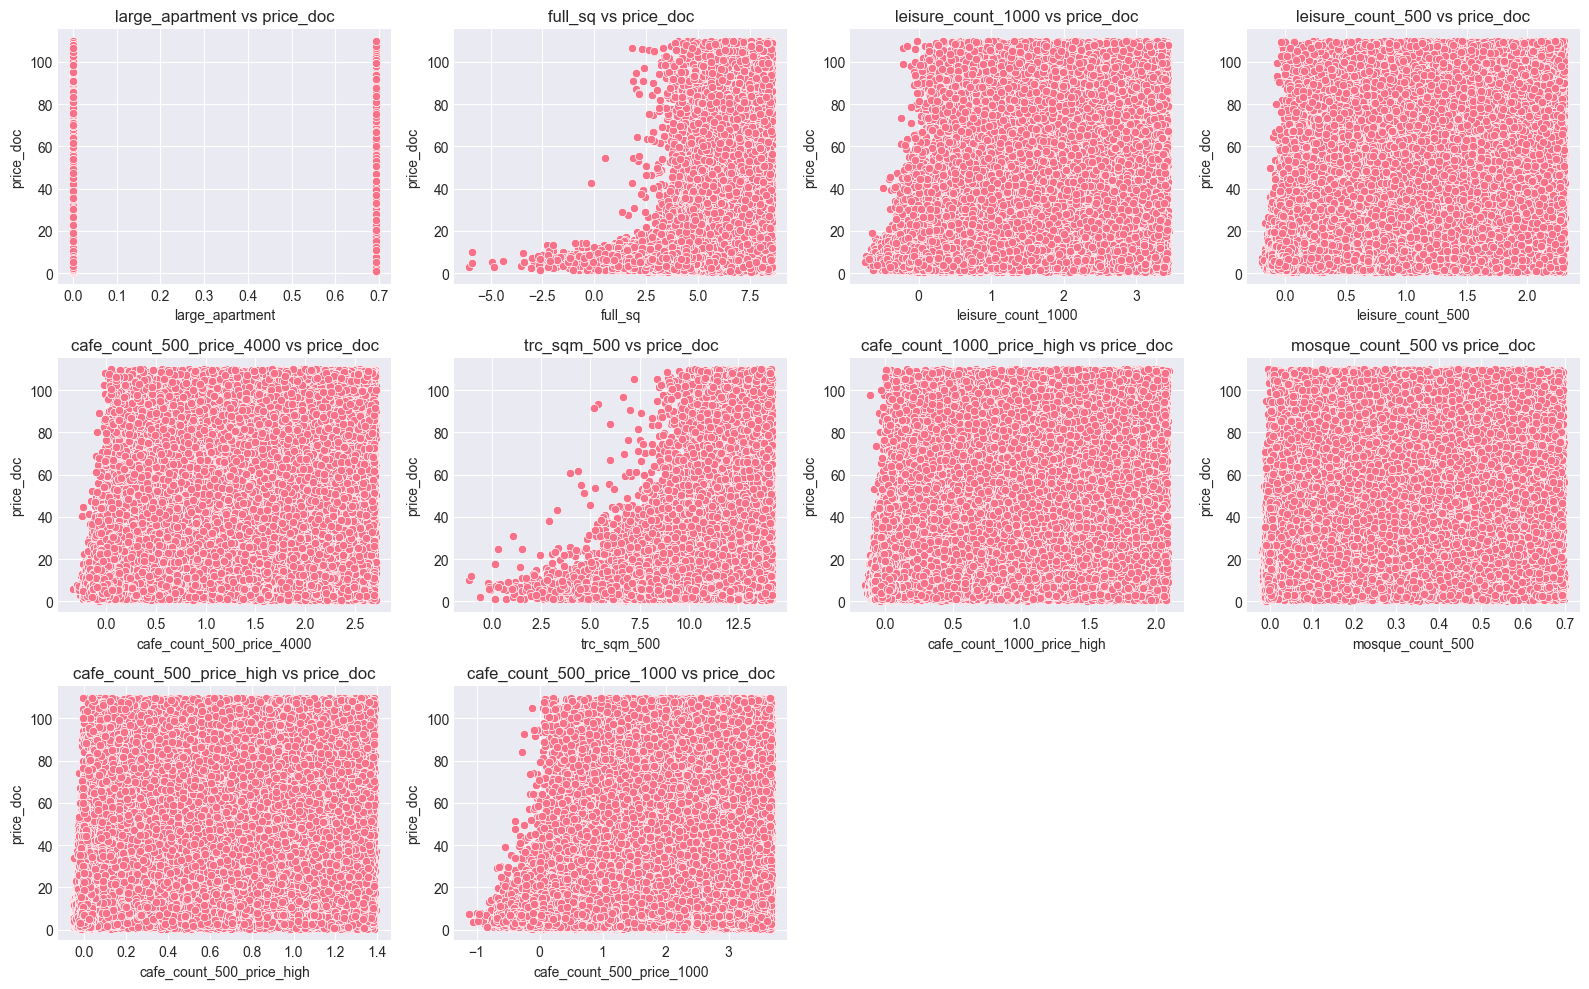

In [40]:
top_corr_features = corr.drop('price_doc').abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(16,10))
for i, col in enumerate(top_corr_features):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=train[col], y=train['price_doc'])
    plt.title(f"{col} vs price_doc")
plt.tight_layout()
plt.show()


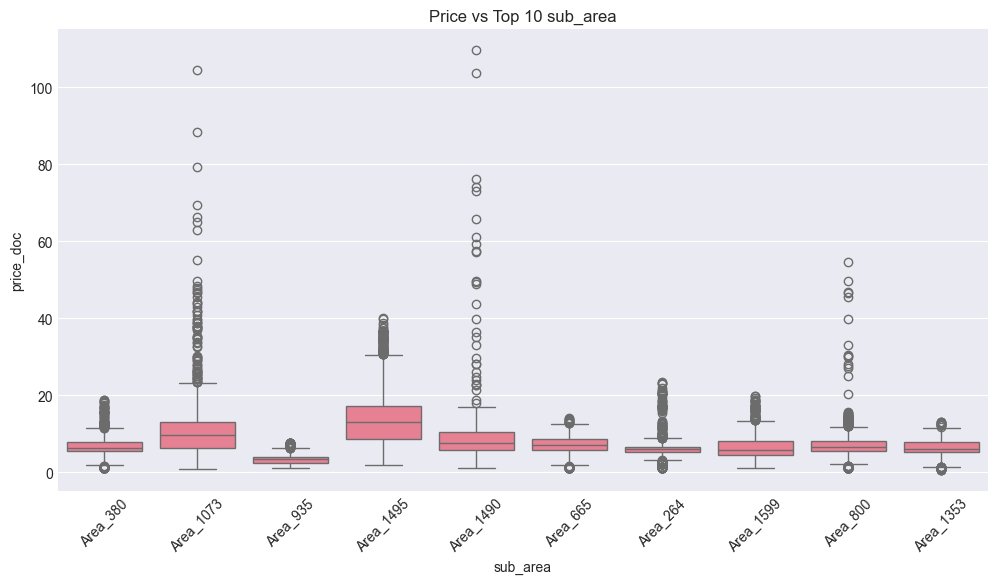

In [41]:
plt.figure(figsize=(12,6))
top_sub_areas = train['sub_area'].value_counts().iloc[:10].index
sns.boxplot(x='sub_area', y='price_doc', data=train[train['sub_area'].isin(top_sub_areas)])
plt.title("Price vs Top 10 sub_area")
plt.xticks(rotation=45)
plt.show()
